In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from keras.datasets import mnist
import tensorflow.keras as kb
from tensorflow.keras import backend
from tensorflow.keras import regularizers
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt

from plotnine import *

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv


In [19]:
# loading the data

red = pd.read_csv("winequality-red.csv", delimiter=";")
white = pd.read_csv("winequality-white.csv", delimiter=";")

# joining the tables
wines = pd.concat([red, white], ignore_index=True)

wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Analysis


Text(0.5, 1.0, 'Correlation Heatmap')

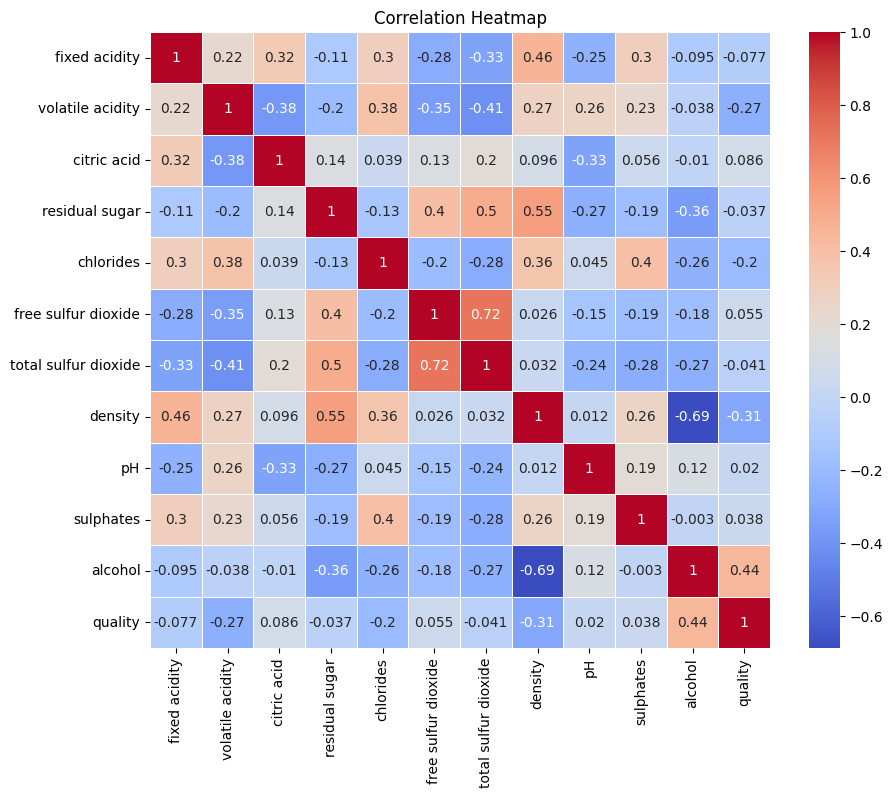

In [4]:
corr = wines.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")

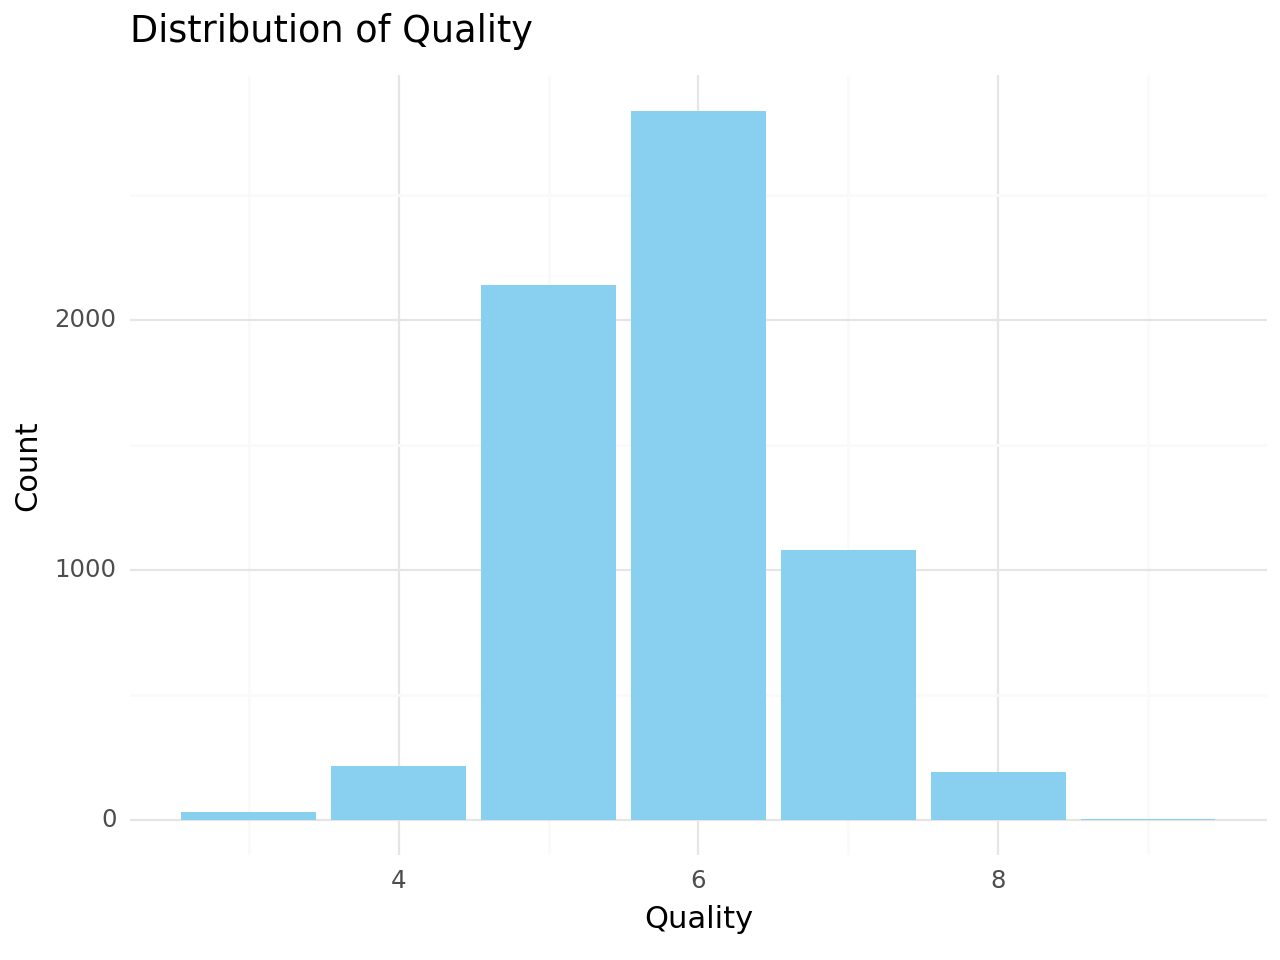

<Figure Size: (640 x 480)>

In [6]:
(ggplot(wines, aes(x="quality", fill = "quality")) +
 geom_bar(position="dodge", fill='#89CFF0') +
 labs(x="Quality", y="Count", title="Distribution of Quality") +
 theme_minimal()
 )

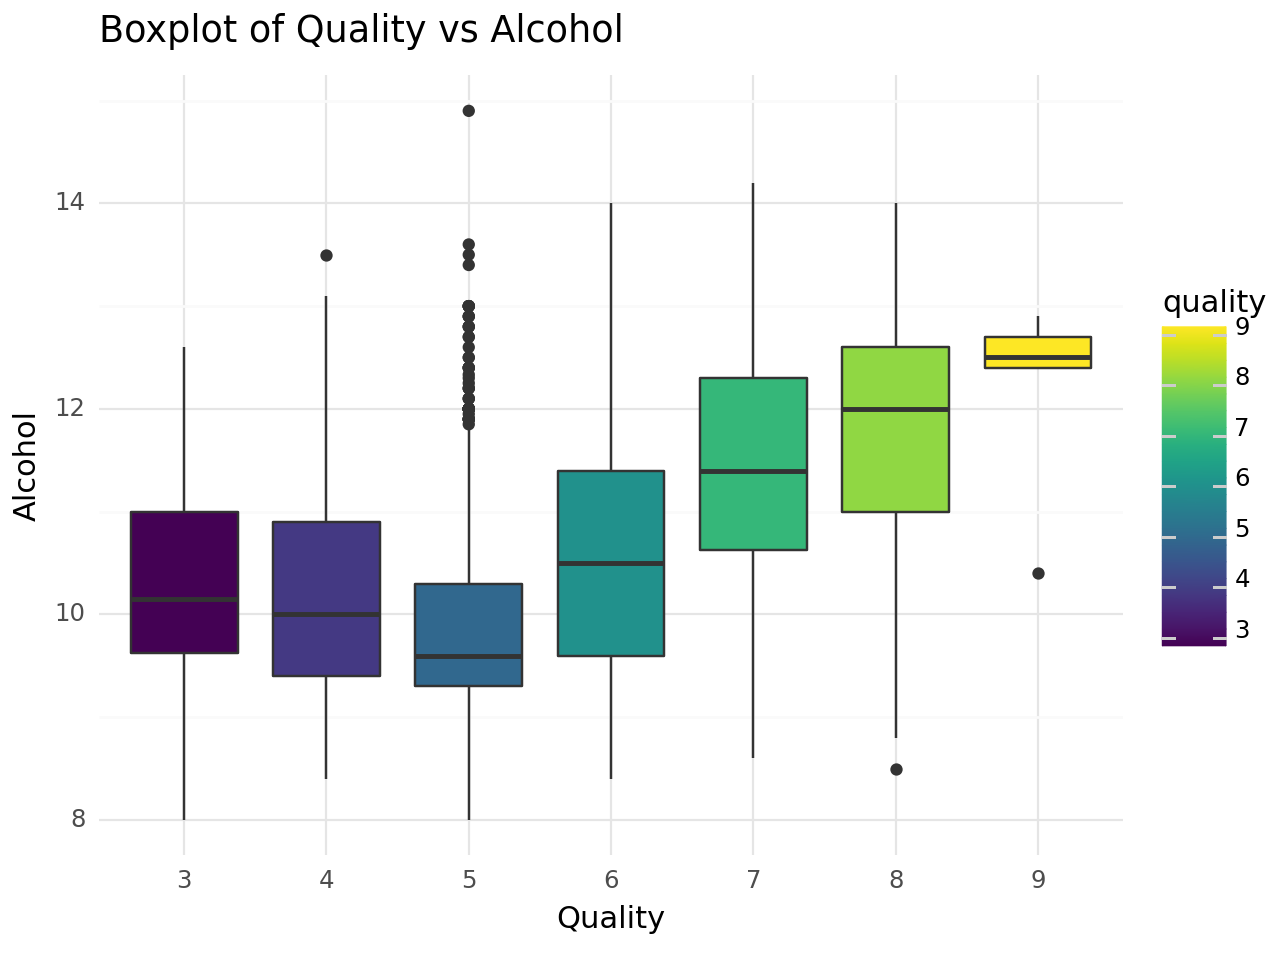

<Figure Size: (640 x 480)>

In [28]:
(ggplot(wines, aes(x="factor(quality)", y="alcohol", fill="quality")) +
          geom_boxplot() +
          theme_minimal() +
          labs(x = "Quality", y="Alcohol", title="Boxplot of Quality vs Alcohol")
)

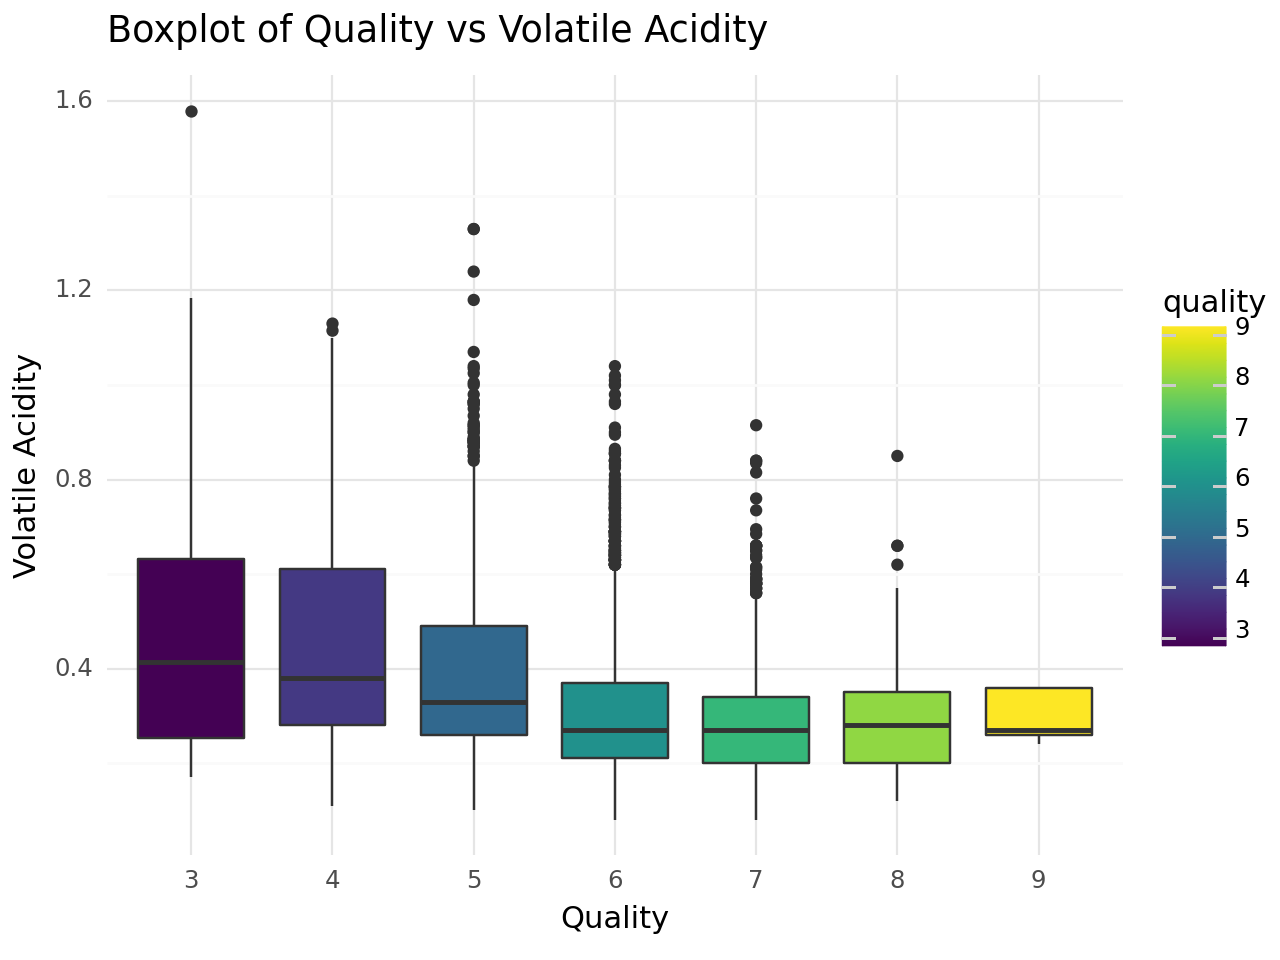

<Figure Size: (640 x 480)>

In [29]:
(ggplot(wines, aes(x="factor(quality)", y="volatile acidity", fill="quality")) +
          geom_boxplot() +
          theme_minimal() +
          labs(x = "Quality", y="Volatile Acidity", title="Boxplot of Quality vs Volatile Acidity")
)

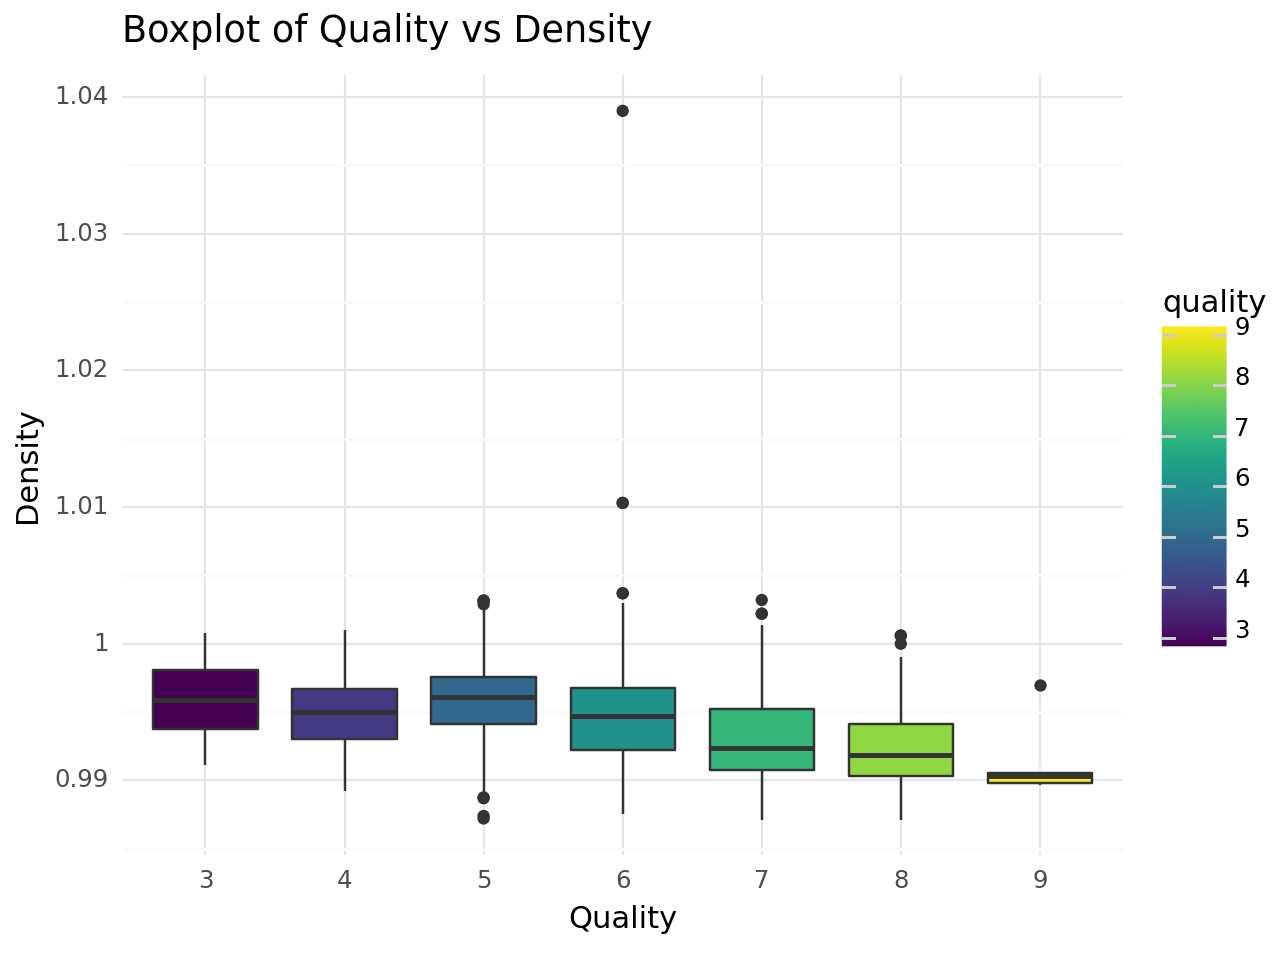

<Figure Size: (640 x 480)>

In [30]:
(ggplot(wines, aes(x="factor(quality)", y="density", fill="quality")) +
          geom_boxplot() +
          theme_minimal() +
          labs(x = "Quality", y="Density", title="Boxplot of Quality vs Density")
)

Build a Deep FEED FORWARD Neural Network (No Convolutional or Recurrent Layers) using keras/tensorflow (at least 3 hidden layers) to predict either a category or a continuous value.

Make sure that:

your NN has some sort of regularization (or multiple types if needed)
you've properly z-scored or otherwise scaled your data before training
your model architechture and loss function are appropriate for the problem
you print out at least 2 metrics for both train and test data to examine

In [20]:
# Train Test Split
features = [col for col in wines.columns if col != 'quality']
predict = "quality"

X = wines[features]
y = wines[predict]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Z-scoring
z = StandardScaler()
X_train[features] = z.fit_transform(X_train[features])
X_test[features] = z.transform(X_test[features])

In [31]:
# Creating the Neural Network model
model = kb.Sequential([
    kb.layers.Dense(10, input_shape=[11]),
    kb.layers.Dense(8, kernel_regularizer="l2"),
    kb.layers.Dense(6),
    kb.layers.Dense(4, kernel_regularizer="l2"),
    kb.layers.Dense(2),
    kb.layers.Dense(1, activation="relu")
])

model.compile(loss = "mean_squared_error",
              optimizer = kb.optimizers.Adam(),
              metrics = ["mean_absolute_error"])

history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
163/163 [==============================] - 5s 8ms/step - loss: 14.8788 - mean_absolute_error: 3.2126 - val_loss: 2.2927 - val_mean_absolute_error: 1.1052
Epoch 2/100
163/163 [==============================] - 1s 6ms/step - loss: 0.9986 - mean_absolute_error: 0.7069 - val_loss: 0.7602 - val_mean_absolute_error: 0.6188
Epoch 3/100
163/163 [==============================] - 1s 4ms/step - loss: 0.7254 - mean_absolute_error: 0.6046 - val_loss: 0.7268 - val_mean_absolute_error: 0.6037
Epoch 4/100
163/163 [==============================] - 1s 3ms/step - loss: 0.6988 - mean_absolute_error: 0.5919 - val_loss: 0.7233 - val_mean_absolute_error: 0.6026
Epoch 5/100
163/163 [==============================] - 1s 4ms/step - loss: 0.6834 - mean_absolute_error: 0.5854 - val_loss: 0.7012 - val_mean_absolute_error: 0.5941
Epoch 6/100
163/163 [==============================] - 1s 4ms/step - loss: 0.6726 - mean_absolute_error: 0.5806 - val_loss: 0.6879 - val_mean_absolute_error: 0.5871
Epoch 7/1

In [32]:
# Calculate the loss function results
train_mse = model.evaluate(X_train, y_train)
test_mse = model.evaluate(X_test, y_test)

print("Train MSE:", train_mse[0])
print("Test MSE:", test_mse[0])
print("Train MAE:", train_mse[1])
print("Test MAE:", test_mse[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.5755 - mean_absolute_error: 0.5775
Train MSE: 0.5507144927978516
Test MSE: 0.5755206942558289
Train MAE: 0.5654149651527405
Test MAE: 0.5775452256202698


Build a simpler ML model from 392 and check if your Neural Net did better (essentially I want you to PROVE whether you needed a neural network for the task or not).

In [39]:
# Create a Linear Regression Model
lr = LinearRegression()

lr.fit(X_train, y_train)

# Calculate the performance metrics
lr_mse_train = mean_squared_error(y_train, lr.predict(X_train))
lr_mse_test = mean_squared_error(y_test, lr.predict(X_test))

lr_mae_train = mean_absolute_error(y_train, lr.predict(X_train))
lr_mae_test = mean_absolute_error(y_test, lr.predict(X_test))


print("MSE Train: ", lr_mse_train)
print("MSE Test: ", lr_mse_test)
print("MAE Train: ", lr_mae_train)
print("MAE Test: ", lr_mae_test)

MSE Train:  0.5349276058636175
MSE Test:  0.5594325262597013
MAE Train:  0.5658118181791268
MAE Test:  0.5790602273806826
